In [4]:
import numpy as np
import matplotlib as plt
from einsteinpy.geodesic import Timelike
from einsteinpy.geodesic import Nulllike
from einsteinpy.plotting.geodesic import StaticGeodesicPlotter
from einsteinpy.hypersurface import SchwarzschildEmbedding
from einsteinpy.plotting import HypersurfacePlotter
from astropy import units as u

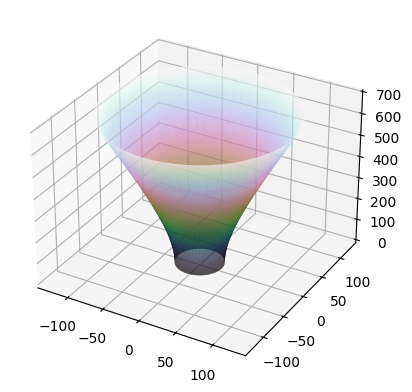

In [5]:
# Visualize Schwarzchild Black hole
surface_obj = SchwarzschildEmbedding(5.927e23 * u.kg)
surface = HypersurfacePlotter(embedding=surface_obj, plot_type='surface')
surface.plot()
surface.show()

In [17]:
# Positions given by r, theta, phi
position = np.array([40., np.pi / 2, 0.])
momentum = np.array([0.0, 0.0, 3.83405]) 

# Spin is 0 since Schwarzchild black holes do not rotate
a = 0

# Solver steps (increasing steps reduces precision but speeds up computation)
steps = 5500

# Step size
delta = 1

In [18]:
geod1 = Timelike(
    metric="Schwarzschild",
    metric_params=(a,),
    position=position,
    momentum=momentum,
    steps=steps,
    delta=delta,
    return_cartesian=True
)

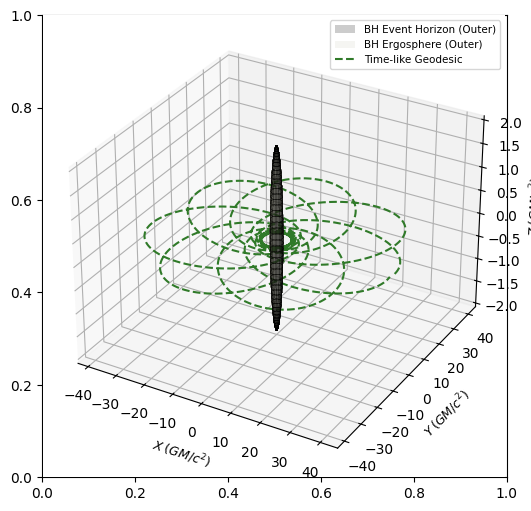

In [19]:
sgpl = StaticGeodesicPlotter()
sgpl.plot(geod1)
sgpl.show()

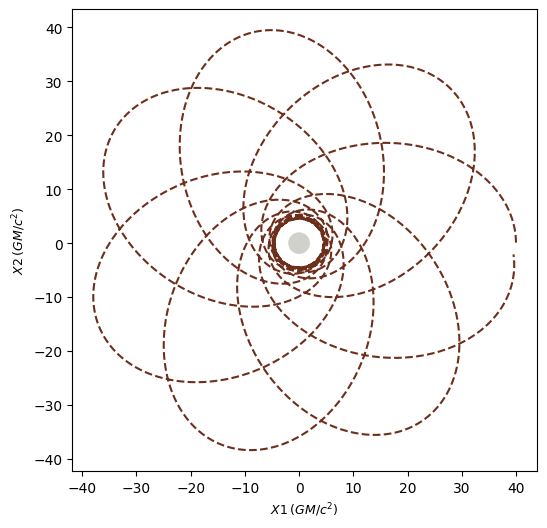

In [20]:
sgpl2 = StaticGeodesicPlotter()
sgpl2.plot2D(geod1, coordinates=(1, 2))

In [43]:
positions = [[2.5, np.pi/2, 0.], [2.5, np.pi/4, 0.]]
momentums = [[0., 0., 0.], [0., np.pi, 0]]

geodesics = []
for i in range(len(positions)):
    pos = positions[i]
    mom = momentums[i]
    geod = Timelike(
        metric="Kerr",
        metric_params=(.99,),
        position=pos,
        momentum=mom,
        steps=7440,
        delta=0.0005,
        omega=.01,
        return_cartesian=True
    )
    geodesics.append(geod)

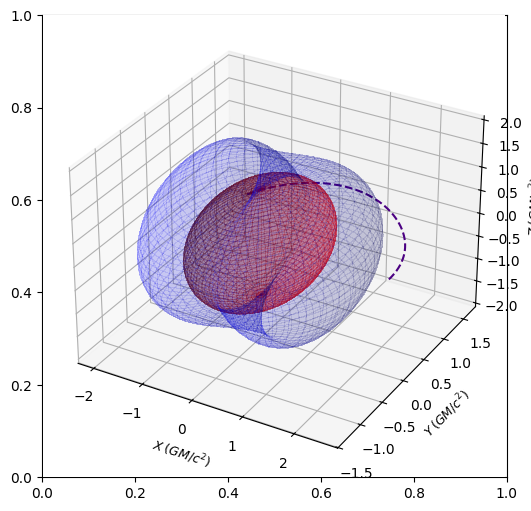

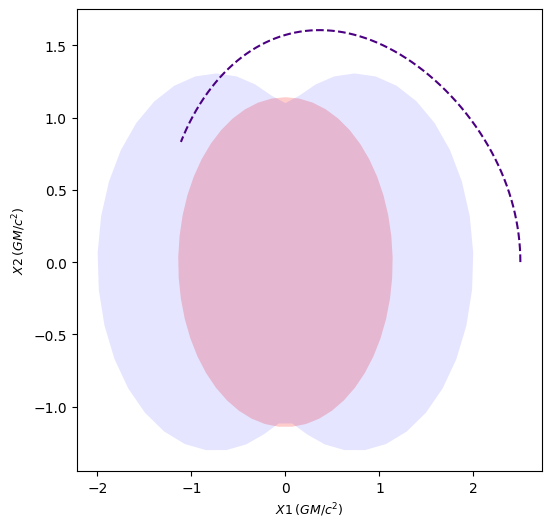

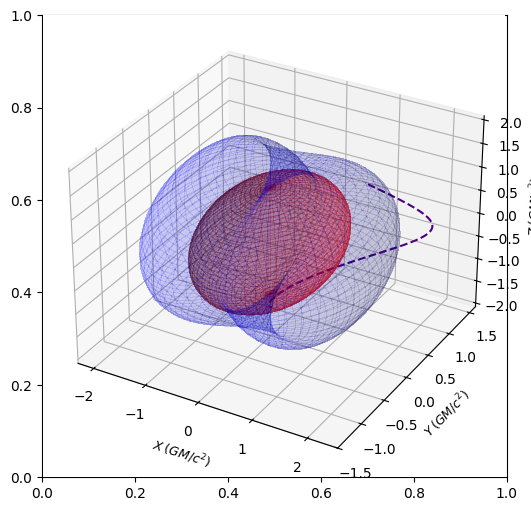

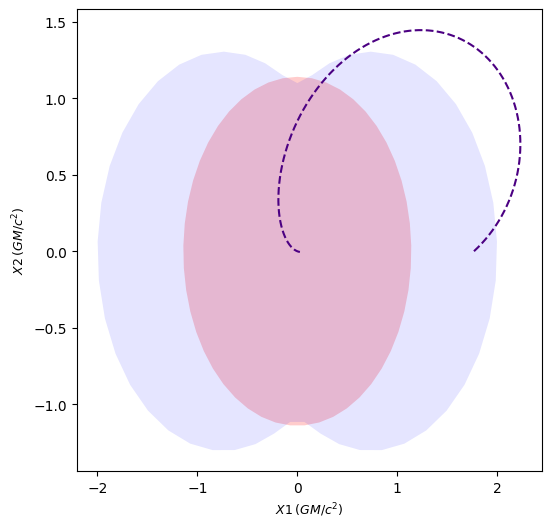

In [46]:
sgpl3 = StaticGeodesicPlotter(bh_colors=("red", "blue"))
for geod in geodesics:
    sgpl3.plot(geod, color="indigo")
    sgpl3.plot2D(geod, color="indigo")
